<a href="https://colab.research.google.com/github/SreeramNithin/UNP-Projects/blob/main/Copy_of_Insurance_Charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Statements**

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 941.6 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from xgboost import XGBRegressor 

# **Loading & Understanding Data**

In [ ]:
data = pd.read_csv('insurance.csv')
data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data=data.drop(['index'],axis=1)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# **EDA (Exploratory Data Analysis)**

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


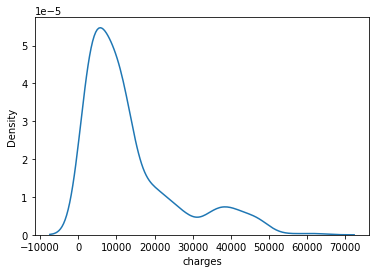

In [ ]:
sns.kdeplot(data['charges'])

In [ ]:
region_data = data.groupby('region')['charges'].mean().sort_values(ascending=False)
region_data

region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64

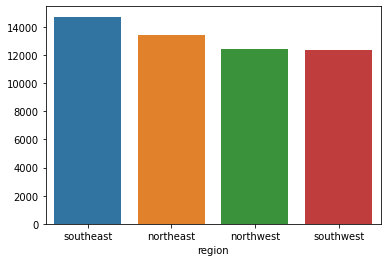

In [ ]:
sns.barplot(x=region_data.index, y=region_data.values)

In [ ]:
smoker_data = data.groupby('smoker')['charges'].mean().sort_values(ascending=False)
smoker_data

smoker
yes    32050.231832
no      8434.268298
Name: charges, dtype: float64

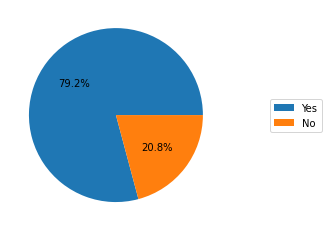

In [ ]:
plt.pie(smoker_data,autopct='%1.1f%%')
plt.legend(['Yes','No'],bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)


In [ ]:
sex_data = data.groupby('sex')['charges'].mean().sort_values(ascending=False)
sex_data

sex
male      13956.751178
female    12569.578844
Name: charges, dtype: float64

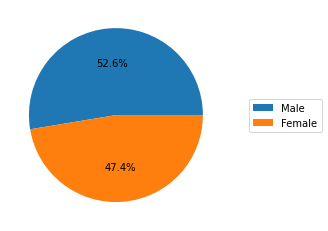

In [ ]:
plt.pie(sex_data,autopct='%1.1f%%')
plt.legend(['Male','Female'],bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)


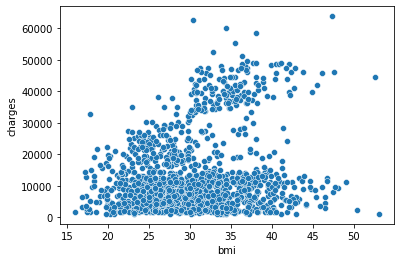

In [ ]:
sns.scatterplot(x='bmi',y = 'charges', data = data)

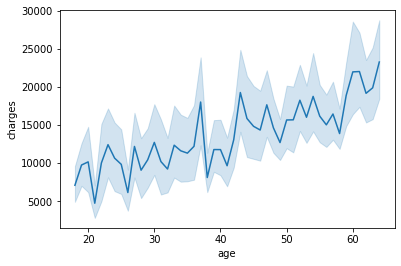

In [ ]:
sns.lineplot(x='age',y = 'charges', data = data)

In [ ]:
children_data = data.groupby('children')['charges'].mean().sort_values(ascending=False)
children_data

children
3    15355.318367
2    15073.563734
4    13850.656311
1    12731.171832
0    12365.975602
5     8786.035247
Name: charges, dtype: float64

In [ ]:
age_data = data.groupby('age')['charges'].mean().sort_values(ascending=False)
age_data

age
64    23275.530837
61    22024.457609
60    21979.418507
63    19884.998461
43    19267.278653
62    19163.856573
59    18895.869532
54    18758.546475
52    18256.269719
37    18019.911877
47    17653.999593
57    16447.185250
55    16164.545488
53    16020.930755
44    15859.396587
51    15682.255867
50    15663.003301
56    15025.515837
45    14830.199856
48    14632.500445
46    14342.590639
58    13878.928112
42    13061.038669
30    12719.110358
49    12696.006264
23    12419.820040
33    12351.532987
36    12204.476138
27    12184.701721
39    11778.242945
40    11772.251310
34    11613.528121
35    11307.182031
24    10648.015962
29    10430.158727
31    10196.980573
20    10159.697736
22    10012.932802
25     9838.365311
19     9747.909335
41     9653.745650
32     9220.300291
28     9069.187564
38     8102.733674
18     7086.217556
26     6133.825309
21     4730.464330
Name: charges, dtype: float64

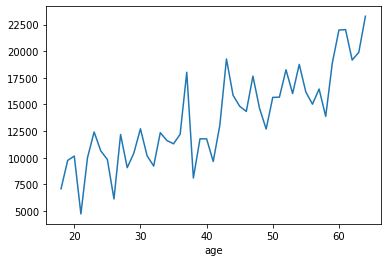

In [ ]:
sns.lineplot(x=age_data.index,y=age_data.values)

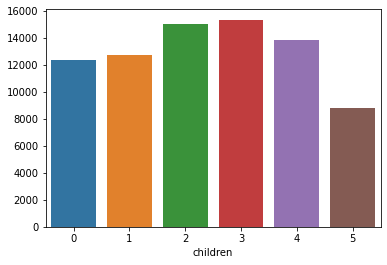

In [ ]:
sns.barplot(x=children_data.index,y=children_data.values)

# **Encoding Data**

## **Encoding 'sex' column**

In [ ]:
data['sex'] = data['sex'].str.replace('male', '0')
data['sex'] = data['sex'].str.replace('fe0', '1')

In [ ]:
data['sex'] = data['sex'].astype(int)
data['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

## **Encoding 'smoker' column**

In [ ]:
data['smoker'] = data['smoker'].str.replace('yes','1')
data['smoker'] = data['smoker'].str.replace('no','0')
data['smoker'] = data['smoker'].astype(int)

In [ ]:
data['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

## **Encoding 'region' column**

In [ ]:
encoder=ce.OneHotEncoder(cols='region',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data = encoder.fit_transform(data)

In [ ]:
data

,age,sex,bmi,children,smoker,region_southwest,region_southeast,region_northwest,region_northeast,charges
0,19,1,27.900,0,1,1.0,0.0,0.0,0.0,16884.92400
1,18,0,33.770,1,0,0.0,1.0,0.0,0.0,1725.55230
2,28,0,33.000,3,0,0.0,1.0,0.0,0.0,4449.46200
3,33,0,22.705,0,0,0.0,0.0,1.0,0.0,21984.47061
4,32,0,28.880,0,0,0.0,0.0,1.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0.0,0.0,1.0,0.0,10600.54830
1334,18,1,31.920,0,0,0.0,0.0,0.0,1.0,2205.98080
1335,18,1,36.850,0,0,0.0,1.0,0.0,0.0,1629.83350
1336,21,1,25.800,0,0,1.0,0.0,0.0,0.0,2007.94500


In [ ]:
data['region_northeast'] = data['region_northeast'].astype(int)
data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)

In [ ]:
data

,age,sex,bmi,children,smoker,region_southwest,region_southeast,region_northwest,region_northeast,charges
0,19,1,27.900,0,1,1,0,0,0,16884.92400
1,18,0,33.770,1,0,0,1,0,0,1725.55230
2,28,0,33.000,3,0,0,1,0,0,4449.46200
3,33,0,22.705,0,0,0,0,1,0,21984.47061
4,32,0,28.880,0,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,0,1,0,10600.54830
1334,18,1,31.920,0,0,0,0,0,1,2205.98080
1335,18,1,36.850,0,0,0,1,0,0,1629.83350
1336,21,1,25.800,0,0,1,0,0,0,2007.94500


# **Varience Inflation Factor (VIF)**

In [ ]:
def compute_vif(considered_features):
    
    V = data[considered_features]
    V['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = V.columns
    vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_southwest',
       'region_southeast', 'region_northwest', 'region_northeast', 'charges'],
      dtype='object')

In [ ]:
considered_features = ['index','age','sex','bmi','children','smoker','region_southwest','region_southeast','region_northwest','region_northeast','charges']

In [ ]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

KeyError: ignored

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt = '0.0%')
plt.show

# **Linear Regression**

In [ ]:
y=data['charges']
x=data.drop(['charges'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = model.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
r2_lr

0.7835929767120723

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_lr = model.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
r2_lr

0.7386659605533754

In [ ]:

from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=1000,random_state=100)
clf.fit(x_train, y_train)
predicted=clf.predict(x_test)

[05:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

y_pred = clf.predict(x_test)
y_pred
     

array([ 1.08670889e+04,  1.00299395e+04,  3.19120391e+04,  1.01284873e+04,
        3.22016973e+04,  5.17139209e+03, -7.58608826e+02,  1.87379785e+04,
        4.26640869e+03,  9.89454590e+03,  2.10885996e+04,  1.08459570e+04,
        3.95159863e+03,  4.34284844e+04,  4.56618906e+04,  4.25593438e+04,
        1.07647080e+04,  4.42294883e+04,  9.26546680e+03,  2.38252559e+04,
        4.23591797e+03,  8.26958008e+03,  4.27372742e+01,  2.62483960e+03,
        1.26627910e+04,  1.23851416e+04,  1.30672031e+04,  5.44079785e+03,
        8.55726465e+03,  3.07876245e+03,  7.01802295e+03,  1.15925078e+04,
        2.40892554e+03,  5.18489404e+03,  4.47425098e+03,  1.26366270e+04,
        2.27580396e+03,  7.83802051e+03,  2.49089707e+04,  3.89309688e+04,
        5.85810596e+03,  3.60405054e+03,  1.31248174e+04,  1.50118809e+04,
        7.07599414e+03,  1.37151094e+04,  1.12269268e+04,  6.43519971e+03,
        4.14979648e+04,  5.21189453e+03,  1.35194756e+04,  1.59624097e+03,
        5.93198779e+03,  

In [ ]:

mae_xgb = mean_absolute_error(y_test, y_pred)
msle_xgb = mean_squared_error(y_test, y_pred)
rmsle_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)
mae_xgb
r2_xgb
     

0.8480953369738253

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mean_absolute_percentage_error"])

# STEP3: Fit the model

history= model.fit(x_train,y_train, epochs= 750, verbose=0)

In [ ]:
NN=model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3143.1523 - mean_absolute_percentage_error: 20.9221


In [ ]:
yprednn=model.predict(x_test)
r2nn=metrics.r2_score(y_test,yprednn)
r2nn

13/13 [==============================] - 0s 2ms/step


0.7047646810451464

In [ ]:
model.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 60        
                                                                 
 dense_7 (Dense)             (None, 5)                 35        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 3)                 15        
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable 

In [ ]:
input_data =('age'=28,'sex'=0,'bmi'=33.000,'children'=3,'smoker'=0,'region_southwest'=0,'region_southeat'=1,'region_northwest'=0,'region_northeast'=0)

SyntaxError: ignored

In [ ]:
input_data_numpy_array=np.asarray(input_data)

In [ ]:
input_data_reshape=input_data_numpy_array.reshape(1,-1)

In [ ]:
prediction=clf.predict(input_data)
print(prediction)

ValueError: ignored